In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')


C:\Users\gaura\AppData\Local\Temp\ipykernel_159368\1279533136.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




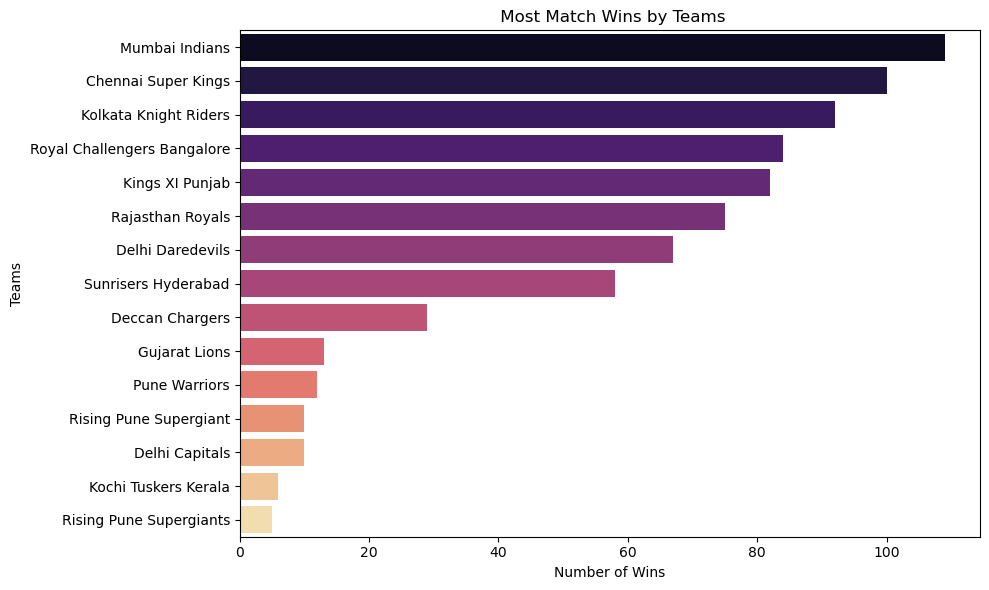

In [19]:
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

plt.figure(figsize=(10,6))
sns.barplot(data=team_wins, y='Team', x='Wins', palette='magma')
plt.title(' Most Match Wins by Teams')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.tight_layout()
plt.show()


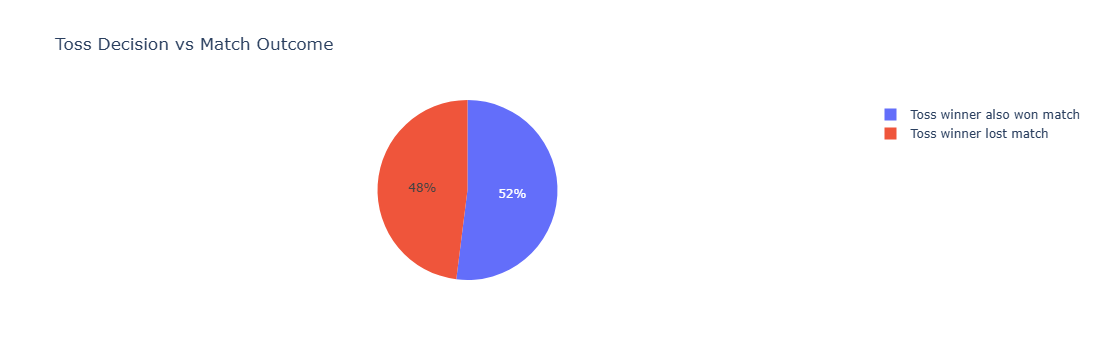

In [10]:
matches['toss_win_match_win'] = matches['toss_winner'] == matches['winner']
toss_impact = matches['toss_win_match_win'].value_counts(normalize=True) * 100

fig = px.pie(values=toss_impact.values, 
             names=['Toss winner also won match', 'Toss winner lost match'],
             title=' Toss Decision vs Match Outcome')
fig.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_159368\2710296796.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




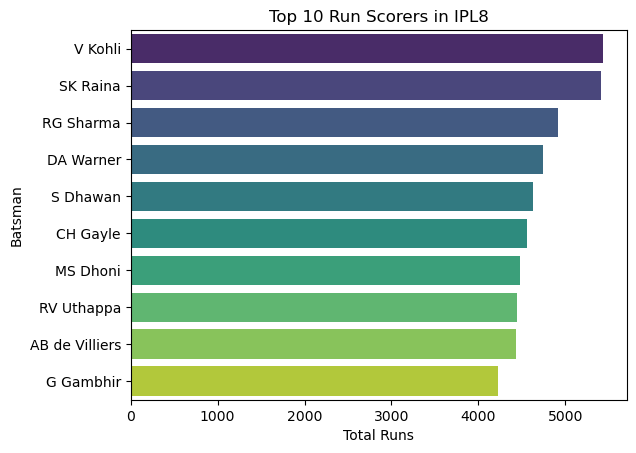

In [20]:
top_scorers = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).reset_index()

sns.barplot(data=top_scorers, y='batsman', x='batsman_runs', palette='viridis')
plt.title('Top 10 Run Scorers in IPL8')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()


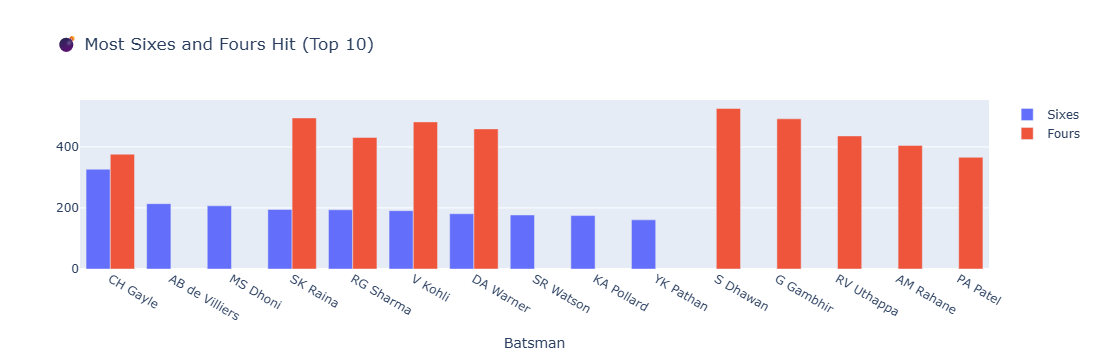

In [5]:
# Sixes
sixes = deliveries[deliveries['batsman_runs'] == 6]['batsman'].value_counts().head(10).reset_index()
sixes.columns = ['Batsman', 'Sixes']

# Fours
fours = deliveries[deliveries['batsman_runs'] == 4]['batsman'].value_counts().head(10).reset_index()
fours.columns = ['Batsman', 'Fours']

fig = go.Figure(data=[
    go.Bar(name='Sixes', x=sixes['Batsman'], y=sixes['Sixes']),
    go.Bar(name='Fours', x=fours['Batsman'], y=fours['Fours'])
])
fig.update_layout(barmode='group', title='💣 Most Sixes and Fours Hit (Top 10)', xaxis_title='Batsman')
fig.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_159368\4108051899.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




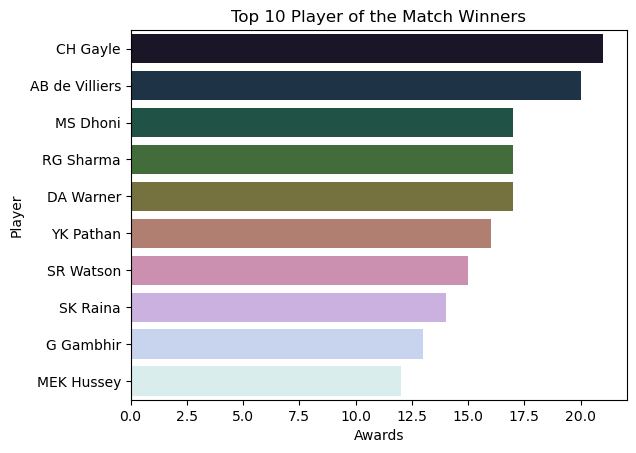

In [14]:
pom = matches['player_of_match'].value_counts().head(10).reset_index()
pom.columns = ['Player', 'Awards']

sns.barplot(data=pom, y='Player', x='Awards', palette='cubehelix')
plt.title('Top 10 Player of the Match Winners')
plt.xlabel('Awards')
plt.ylabel('Player')
plt.show()


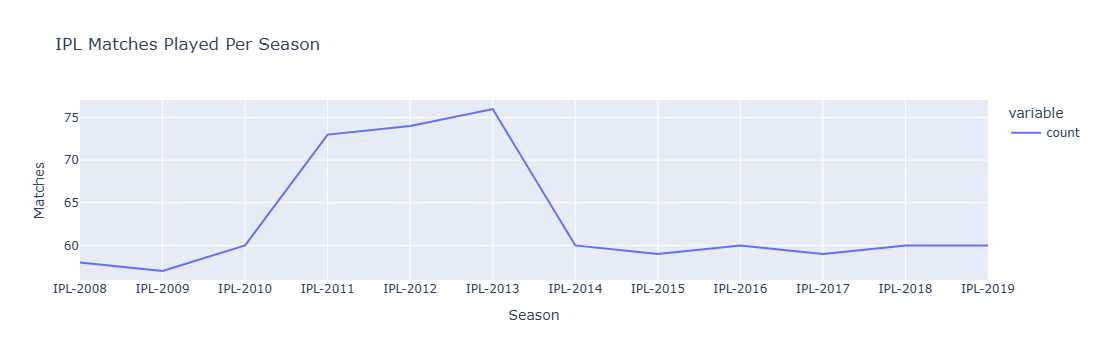

In [17]:
Season_matches = matches['Season'].value_counts().sort_index()

px.line(Season_matches, title=' IPL Matches Played Per Season', labels={'value': 'Matches', 'index': 'Season'})
